Projeto de Transfer Learning em Python

TO projeto consiste em aplicar o método de Transfer Learning em uma rede de Deep Learning na linguagem Python no ambiente COLAB.  

Para exemplo, utilizaremos o seguinte projeto que realiza Transfer Learning com o Dataset do MNIST:
https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb

O dataset utilizado engloba duas classes: gatos e cachorros. Uma descrição da base de dados pode ser visualizada neste link: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs.

Já o dataset para download pode ser acessado por meio deste outro link:

https://www.microsoft.com/en-us/download/details.aspx?id=54765.



### Importando as bibliotecas necessárias

In [94]:
%matplotlib inline

import os
import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from tensorflow.keras.preprocessing import image

### Download do Dataset Garos e Cachorros

O primeiro passo será carregar nossos dados. Para o nosso projeto  usaremos o conjunto de dados https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip, que contém gatos e cachorros

Para obter este conjunto de dados, você pode executar o script de download `download.sh` na pasta `data` ou os seguintes comandos:


    wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
    
    unzip kagglecatsanddogs_5340.zip



In [95]:
!curl -L -o cats_and_dogs_filtered.zip https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip
!rm cats_and_dogs_filtered.zip
!ls
!pwd



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0  15.8M      0  0:00:04  0:00:04 --:--:-- 15.8M
Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dog

In [96]:
# Definidio as categorias em ['PetImages/Cat', 'PetImages/Dog']
root = 'cats_and_dogs_filtered/train/'
exclude = []
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['cats_and_dogs_filtered/train/cats', 'cats_and_dogs_filtered/train/dogs']


In [98]:
!ls cats_and_dogs_filtered/train/cats

cat.0.jpg    cat.229.jpg  cat.358.jpg  cat.487.jpg  cat.615.jpg  cat.744.jpg  cat.873.jpg
cat.100.jpg  cat.22.jpg   cat.359.jpg  cat.488.jpg  cat.616.jpg  cat.745.jpg  cat.874.jpg
cat.101.jpg  cat.230.jpg  cat.35.jpg   cat.489.jpg  cat.617.jpg  cat.746.jpg  cat.875.jpg
cat.102.jpg  cat.231.jpg  cat.360.jpg  cat.48.jpg   cat.618.jpg  cat.747.jpg  cat.876.jpg
cat.103.jpg  cat.232.jpg  cat.361.jpg  cat.490.jpg  cat.619.jpg  cat.748.jpg  cat.877.jpg
cat.104.jpg  cat.233.jpg  cat.362.jpg  cat.491.jpg  cat.61.jpg	 cat.749.jpg  cat.878.jpg
cat.105.jpg  cat.234.jpg  cat.363.jpg  cat.492.jpg  cat.620.jpg  cat.74.jpg   cat.879.jpg
cat.106.jpg  cat.235.jpg  cat.364.jpg  cat.493.jpg  cat.621.jpg  cat.750.jpg  cat.87.jpg
cat.107.jpg  cat.236.jpg  cat.365.jpg  cat.494.jpg  cat.622.jpg  cat.751.jpg  cat.880.jpg
cat.108.jpg  cat.237.jpg  cat.366.jpg  cat.495.jpg  cat.623.jpg  cat.752.jpg  cat.881.jpg
cat.109.jpg  cat.238.jpg  cat.367.jpg  cat.496.jpg  cat.624.jpg  cat.753.jpg  cat.882.jpg
cat.10.jpg  

In [99]:
!ls cats_and_dogs_filtered/train/dogs

dog.0.jpg    dog.229.jpg  dog.358.jpg  dog.487.jpg  dog.615.jpg  dog.744.jpg  dog.873.jpg
dog.100.jpg  dog.22.jpg   dog.359.jpg  dog.488.jpg  dog.616.jpg  dog.745.jpg  dog.874.jpg
dog.101.jpg  dog.230.jpg  dog.35.jpg   dog.489.jpg  dog.617.jpg  dog.746.jpg  dog.875.jpg
dog.102.jpg  dog.231.jpg  dog.360.jpg  dog.48.jpg   dog.618.jpg  dog.747.jpg  dog.876.jpg
dog.103.jpg  dog.232.jpg  dog.361.jpg  dog.490.jpg  dog.619.jpg  dog.748.jpg  dog.877.jpg
dog.104.jpg  dog.233.jpg  dog.362.jpg  dog.491.jpg  dog.61.jpg	 dog.749.jpg  dog.878.jpg
dog.105.jpg  dog.234.jpg  dog.363.jpg  dog.492.jpg  dog.620.jpg  dog.74.jpg   dog.879.jpg
dog.106.jpg  dog.235.jpg  dog.364.jpg  dog.493.jpg  dog.621.jpg  dog.750.jpg  dog.87.jpg
dog.107.jpg  dog.236.jpg  dog.365.jpg  dog.494.jpg  dog.622.jpg  dog.751.jpg  dog.880.jpg
dog.108.jpg  dog.237.jpg  dog.366.jpg  dog.495.jpg  dog.623.jpg  dog.752.jpg  dog.881.jpg
dog.109.jpg  dog.238.jpg  dog.367.jpg  dog.496.jpg  dog.624.jpg  dog.753.jpg  dog.882.jpg
dog.10.jpg  

In [100]:
!pwd #diretorio atual
!cd cats_and_dogs_filtered/train/
!ls


/content
 cats_and_dogs_filtered   CDLA-Permissive-2.0.pdf   PetImages  'readme[1].txt'	 sample_data


Esta função é útil para pré-processar os dados em uma imagem e um vetor de entrada.

In [101]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Carregar todas as imagens da pasta root

In [102]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# Contando os números de classes
num_classes = len(categories)

*Randomiza* a ordem dos dados.

In [103]:
random.shuffle(data)

criar divisão de treinamento/validação/teste (70%, 15%, 15%)

In [104]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

Dados separados para rótulos.



In [105]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]


**Pré**-processamento dos dados como antes, certificando-se de que sejam float32 e normalizados entre 0 e 1.


In [106]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(300, 2)


*Vamos* fazer um resumo do que temos.

In [107]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)


finished loading 2000 images from 2 categories
train / validation / test split: 1400, 300, 300
training data shape:  (1400, 224, 224, 3)
training labels shape:  (1400, 2)



Vejamos rapidamente alguns exemplos de imagens de nosso conjunto de dados.

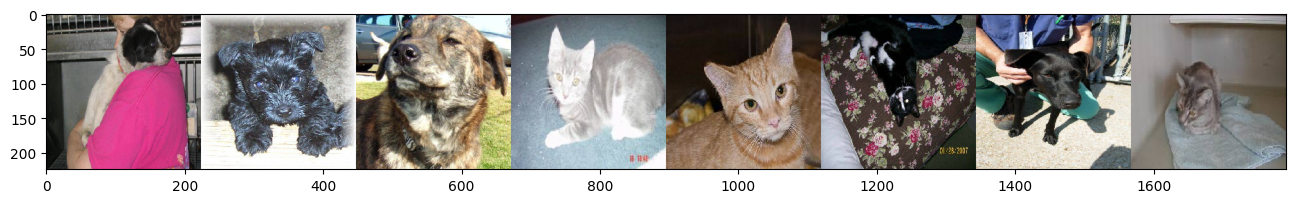

In [108]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

Primeiro treinando uma rede neural do zero
**negrito**

Ao compilar a rede, vamos executar `model.summary()` para obter um instantâneo de suas camadas.

In [109]:
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                  

# Criamos uma rede de tamanho médio com aproximadamente 1,2 milhão de pesos e tendências (os parâmetros). A maioria deles está levando a uma camada totalmente conectada pré-softmax "dense_5".

Agora podemos prosseguir e treinar nosso modelo para 100 épocas com um tamanho de lote de 128. Também registraremos seu histórico para que possamos representar graficamente a perda ao longo do tempo mais tarde.

In [110]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))


Epoch 1/10
11/11 [==============================] - 20s 914ms/step - loss: 0.7058 - accuracy: 0.5071 - val_loss: 0.6898 - val_accuracy: 0.4867
Epoch 2/10
11/11 [==============================] - 3s 272ms/step - loss: 0.6771 - accuracy: 0.5679 - val_loss: 0.6802 - val_accuracy: 0.5400
Epoch 3/10
11/11 [==============================] - 3s 278ms/step - loss: 0.6574 - accuracy: 0.5957 - val_loss: 0.6740 - val_accuracy: 0.5833
Epoch 4/10
11/11 [==============================] - 3s 294ms/step - loss: 0.6460 - accuracy: 0.6129 - val_loss: 0.6554 - val_accuracy: 0.6300
Epoch 5/10
11/11 [==============================] - 3s 283ms/step - loss: 0.6385 - accuracy: 0.6321 - val_loss: 0.6407 - val_accuracy: 0.6233
Epoch 6/10
11/11 [==============================] - 3s 271ms/step - loss: 0.6265 - accuracy: 0.6471 - val_loss: 0.6315 - val_accuracy: 0.6500
Epoch 7/10
11/11 [==============================] - 3s 283ms/step - loss: 0.6023 - accuracy: 0.6593 - val_loss: 0.6126 - val_accuracy: 0.6633
Epoch

*Vamos* representar graficamente a perda de validação e a precisão da validação ao longo do tempo.

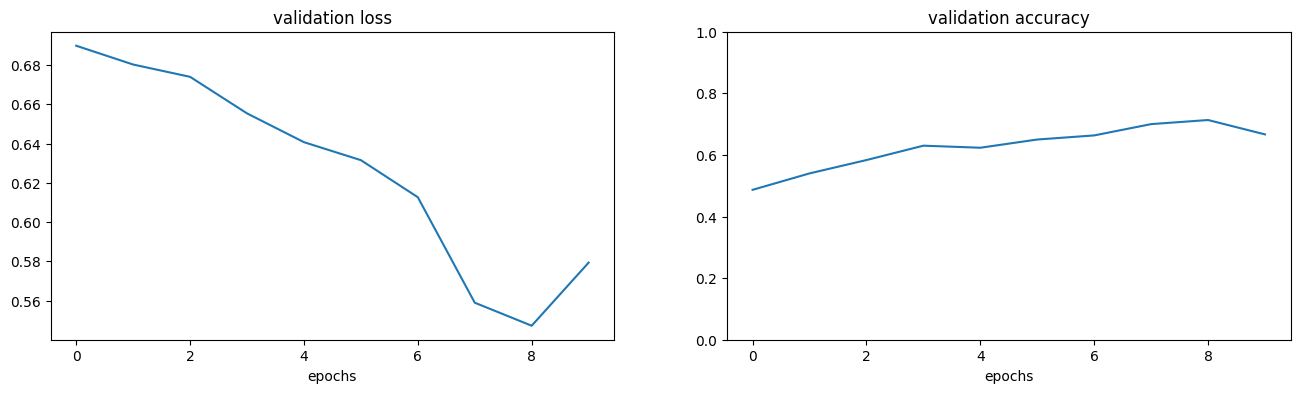

In [112]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [113]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.6176786422729492
Test accuracy: 0.6733333468437195


In [114]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 [==============================] - 24s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [115]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)


In [116]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history2 = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))


Epoch 1/10
11/11 [==============================] - 64s 4s/step - loss: 1.0418 - accuracy: 0.5121 - val_loss: 0.7766 - val_accuracy: 0.4967
Epoch 2/10
11/11 [==============================] - 9s 838ms/step - loss: 0.6513 - accuracy: 0.6157 - val_loss: 0.6044 - val_accuracy: 0.5500
Epoch 3/10
11/11 [==============================] - 8s 714ms/step - loss: 0.5006 - accuracy: 0.7407 - val_loss: 0.4930 - val_accuracy: 0.7233
Epoch 4/10
11/11 [==============================] - 9s 828ms/step - loss: 0.4279 - accuracy: 0.8243 - val_loss: 0.4100 - val_accuracy: 0.8567
Epoch 5/10
11/11 [==============================] - 9s 837ms/step - loss: 0.3830 - accuracy: 0.8500 - val_loss: 0.3769 - val_accuracy: 0.8733
Epoch 6/10
11/11 [==============================] - 9s 857ms/step - loss: 0.3590 - accuracy: 0.8700 - val_loss: 0.3576 - val_accuracy: 0.8800
Epoch 7/10
11/11 [==============================] - 9s 855ms/step - loss: 0.3430 - accuracy: 0.8714 - val_loss: 0.3473 - val_accuracy: 0.8700
Epoch 8/

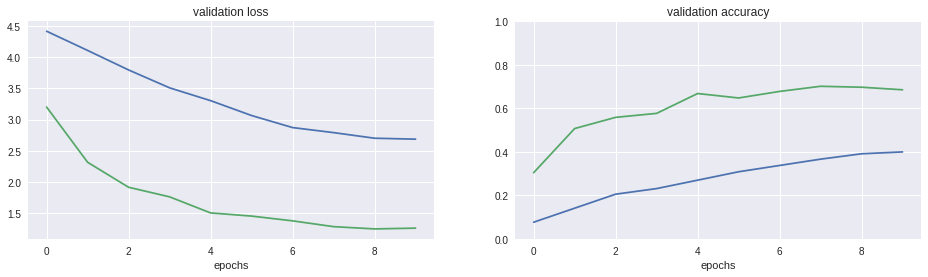

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_acc"])
ax2.plot(history2.history["val_acc"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.1540323304004423
Test accuracy: 0.7156652360515021


In [ ]:
img, x = get_image('101_ObjectCategories/airplanes/image_0003.jpg')
probabilities = model_new.predict([x])


0.6425913
